# Анализ развлекательного приложения Procrastinate Pro+ #

**Описание проекта**

Компания владелец развлекательного приложения Procrastinate Pro+ за последние несколько месяцев несет убытки, несмотря на огромные вложения в рекламу.

**Цель исследования**

Разобраться в причинах финансовых потерь (как маркетинговому аналитику), помочь компании выйти в плюс.

**Описание данных**

Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года представлены в 3 датасетах:

1. visits_info_short.csv - лог сервера с информацией о посещениях сайта
    - User Id — уникальный идентификатор пользователя;
    - Region — страна пользователя;
    - Device — тип устройства пользователя;
    - Channel — идентификатор источника перехода;
    - Session Start — дата и время начала сессии;
    - Session End — дата и время окончания сессии.
2. orders_info_short.csv - информация о заказах
    - User Id — уникальный идентификатор пользователя;
    - Event Dt — дата и время покупки;
    - Revenue — сумма заказа.
3. costs_info_short.csv - информация о расходах на рекламу
    - dt - дата проведения рекламной компании;
    - Channel — идентификатор рекламного источника;
    - сosts — расходы на эту кампанию.


**Задача**

    -	откуда приходят пользователи и какими устройствами они пользуются;
    -	сколько стоит привлечение пользователей из различных рекламных каналов;
    -	сколько денег приносит каждый клиент;
    -	когда расходы на привлечение клиента окупаются;
    -	какие факторы мешают привлечению клиентов.

**План работы**

1. Изучим общую информацию
2. Предобработка данных
3. Функции для расчета и анализа LTV, ROI, удержания и конверсии
4. Исследовательский анализ данных
5. Изучение маркетинговых метрик
6. Оценим окупаемость рекламы
7. Итоговый вывод

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Импорт библиотек ####

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import datetime
from datetime import date, timedelta as td
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import date, timedelta as td
pd.set_option('display.max_columns', 30) 
pd.set_option("display.float_format", "{:.2f}".format)

#### Чтение данных ####

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [3]:
(visits.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
(orders.info())
(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs = pd.read_csv('/datasets/costs_info_short.csv')
(costs.info())
(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


####  Вывод ####

В предоставленных данных отсутствуют пропуски. Необходимо привести названия столбцов к нижнему регистру, заменить пробелы в названиях столбцов на нижнее подчеркивание, проверить данные на наличие дубликатов, привести типы данных в соответствие со значениями.

### Предобработка данных ###

#### Переименуем столбцы ####

In [6]:
# переименуем столбцы costs - приведем к нижнему регистру
costs.columns = costs.columns.str.lower()
(costs.columns)

Index(['dt', 'channel', 'costs'], dtype='object')

In [7]:
# переименуем столбцы visits - приведем к нижнему регистру
visits.columns = visits.columns.str.lower()
(visits.columns)

Index(['user id', 'region', 'device', 'channel', 'session start',
       'session end'],
      dtype='object')

In [8]:
# переименуем столбцы orders - приведем к нижнему регистру
orders.columns = orders.columns.str.lower()
(orders.columns)

Index(['user id', 'event dt', 'revenue'], dtype='object')

#### Заменим пробелы в названиях столбцов на нижнее подчеркивание ####

In [9]:
# переименуем столбцы visits - заменим пробел на нижнее подчеркивание
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
(visits.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [10]:
# переименуем столбцы orders - заменим пробел на нижнее подчеркивание
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})
(orders.columns)

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

#### Проверим данные на наличие дубликатов ####

In [11]:
('Количество дубликатов visits:', visits.duplicated().sum())

('Количество дубликатов visits:', 0)

In [12]:
('Количество дубликатов orders:', orders.duplicated().sum())

('Количество дубликатов orders:', 0)

In [13]:
('Количество дубликатов costs:', costs.duplicated().sum())

('Количество дубликатов costs:', 0)

#### Приведем данные к необходимому типу ####

In [14]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [15]:
for i in [visits, orders, costs]:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage:

#### Вывод ####

Привели названия столбцов к нижнему регистру, заменили пропуски в названиях на нижнее подчеркивание, не обнаружили дубликатов в данных и привели столбцы с датой к типу с соответствующим значением.

In [16]:
duplicate_visits = visits[visits.duplicated(keep='last')]
duplicate_visits

,user_id,region,device,channel,session_start,session_end


In [17]:
duplicate_orders = orders[orders.duplicated(keep='last')]
duplicate_orders

,user_id,event_dt,revenue


In [18]:
duplicate_costs = orders[orders.duplicated(keep='last')]
duplicate_costs

,user_id,event_dt,revenue


In [19]:
(visits['region'].unique())

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [20]:
(visits['device'].unique())

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [21]:
(visits['channel'].unique())

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания профилей пользователя - get_profiles() ####

In [22]:
def get_profiles(visits, orders, costs):
    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles   

#### Функция для подсчета Retention Rate - get_retention() ####

In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


#### Функция для подсчета конверсии - get_conversion() ####

In [24]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time
 

#### Функция для расчета LTV - get_ltv() ####

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для построения графиков сглаживания данных - filter_data() ####

In [26]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для построения графика Retention Rate - plot_retention() ####

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()


#### Функция для построения графика конверсии - plot_conversion() ####

In [28]:
# функция для визуализации конверси

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [		
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


#### Функция для построения графиков визуализации - plot_ltv_roi() ####

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей. ####

In [30]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head())

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23  


Опредделим минимальную и максимальную даты привлечениея пользователей.

In [31]:
# момент аннализа 
observation_date = datetime(2019, 11, 1).date()
# горизонт анализа 
horizon_days = 14

print(f'минимальная дата привлечения пользователей {profiles.dt.min()}')
print(f'максимальная дата привлечения пользователей {profiles.dt.max()}')

минимальная дата привлечения пользователей 2019-05-01
максимальная дата привлечения пользователей 2019-10-27


##### Вывод #####

Определили дату начала анализа (первая дата привлечения ) 01.05.19г.
Концом периода анализа будет дата  1.11.19г.

####  Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны. ####

In [32]:
country = profiles.pivot_table(index='region', columns='payer', values='user_id', aggfunc='count')\
.rename(columns={True: 'payer', False: 'not_payer'})\
.sort_values('payer', ascending = False)
(country.head())

payer,not_payer,payer
region,,
United States,93100,6902
UK,16875,700
France,16787,663
Germany,14365,616


In [33]:
# доля платящих пользователей
country['payer_share'] = ((country['payer'] / (country['payer'] + country['not_payer'])) * 100).round(2)
country['total_payer'] = (country['not_payer']+country['payer'])
(country.head())

payer,not_payer,payer,payer_share,total_payer
region,,,,
United States,93100,6902,6.90,100002
UK,16875,700,3.98,17575
France,16787,663,3.80,17450
Germany,14365,616,4.11,14981


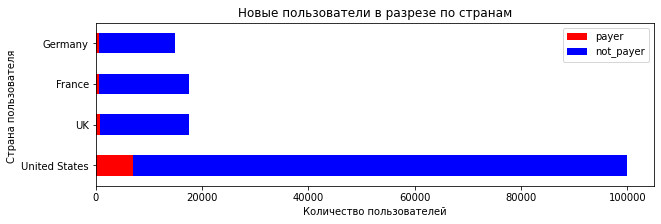

In [34]:
fig, ax = plt.subplots(figsize=(10, 3))
country[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, color=['r', 'b'])
ax.legend(bbox_to_anchor = (1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Страна пользователя ')
ax.set_title('Новые пользователи в разрезе по странам')
plt.show()

##### Вывод #####

2/3 всех пользователей приложения приходится на США, одна треть на страны Европы. Так же в США больше платящих пользователей чем в странах Европы (почти на 70% больше чем в каждой из стран). 

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства. ####

In [35]:
device = profiles.pivot_table(index='device', columns='payer', values='user_id', aggfunc='count')\
.rename(columns={True: 'payer', False: 'not_payer'})\
.sort_values('payer', ascending = False)

In [36]:
device['payer_share'] = ((device['payer'] / (device['payer'] + device['not_payer'])) * 100).round(2)
device['total_payer'] = (device['not_payer']+device['payer'])
(device.head())

payer,not_payer,payer,payer_share,total_payer
device,,,,
iPhone,51097,3382,6.21,54479
Android,32982,2050,5.85,35032
Mac,28130,1912,6.36,30042
PC,28918,1537,5.05,30455


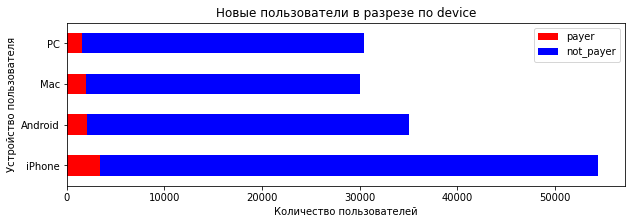

In [37]:
fig, ax = plt.subplots(figsize=(10, 3))
device[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, color=['r', 'b'])
ax.legend(bbox_to_anchor = (1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Устройство пользователя')
ax.set_title('Новые пользователи в разрезе по device')
plt.show()

##### Вывод #####

Клиенты предпочитают использовать продукцию Apple (примерно 30% приходится на iPhone,  на Mac -20%). Они также превосходят в платном использовании приложения.

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения. ####

In [38]:
channel = profiles.pivot_table(index='channel', columns='payer', values='user_id', aggfunc='count')\
.rename(columns={True: 'payer', False: 'not_payer'})\
.sort_values('payer', ascending = False)

In [39]:
channel['payer_share'] = ((channel['payer'] / (channel['payer'] + channel['not_payer'])) * 100).round(2)
channel['total_payer'] = (channel['not_payer']+channel['payer'])
(channel.head(12))

payer,not_payer,payer,payer_share,total_payer
channel,,,,
FaceBoom,25587,3557,12.20,29144
TipTop,17683,1878,9.60,19561
organic,55279,1160,2.06,56439
WahooNetBanner,8100,453,5.30,8553
AdNonSense,3440,440,11.34,3880
RocketSuperAds,4096,352,7.91,4448
LeapBob,8291,262,3.06,8553
OppleCreativeMedia,8372,233,2.71,8605
lambdaMediaAds,1924,225,10.47,2149


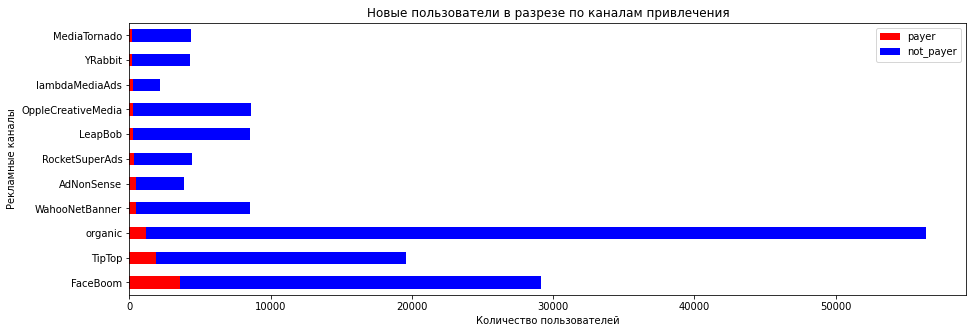

In [40]:
fig, ax = plt.subplots(figsize=(15, 5))
channel[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, color=['r', 'b'])
ax.legend(bbox_to_anchor = (1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Рекламные каналы')
ax.set_title('Новые пользователи в разрезе по каналам привлечения')
plt.show()

##### Вывод #####

Больше всего пришло пользователей в приложение из бесплатного объявления в поисковой раздаче (примерно 30%), они же и меньше всего оплачивают пользование приложением. Второе место по переходу пользователей занимает канал FaceBoom (лидер по оплате), третье место - TipTop (они же 4 в рейтинге оплаты).

#### Вывод ####

Проанализировав данные можно сказать что почти 67% пользователей приложением являются граждане США. На Страны европы приходится 33% (примерно поровну между Англией, Германией, Францией). Пользователи предпочитают использовать iPhone и  Mac - в сумме больше 50%. Лучшим каналом с которого приходят платящие пользователи является FacrBoom, а худшим organic.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [41]:
# общая сумма расходов на маркетинг
(f'общая сумма расходов на маркетинг {costs.costs.sum().round()}')

'общая сумма расходов на маркетинг 105497.0'

#### Определим распределение трат по рекламным каналам ####

In [42]:
cos = costs.pivot_table(index='channel', values='costs', aggfunc='sum')\
.sort_values('costs', ascending = False).reset_index()

In [43]:
cos['%'] = (cos['costs'] / cos['costs'].sum()) * 100
(cos.head(10))

,channel,costs,%
0,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
2,WahooNetBanner,5151.00,4.88
3,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
6,LeapBob,1797.60,1.70
7,lambdaMediaAds,1557.60,1.48
8,MediaTornado,954.48,0.90
9,YRabbit,944.22,0.90


##### Вывод #####

Первое место по тратам занимает канал TipTop - 51,9%, второе место - FaceBoom - 30,75%.

#### Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. На 2  графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику. ####

In [44]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
(costs.head())

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.30,18,5
1,2019-05-02,FaceBoom,78.10,18,5
2,2019-05-03,FaceBoom,85.80,18,5
3,2019-05-04,FaceBoom,136.40,18,5
4,2019-05-05,FaceBoom,122.10,18,5


In [45]:
(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   week     1800 non-null   UInt32        
 4   month    1800 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 65.2+ KB


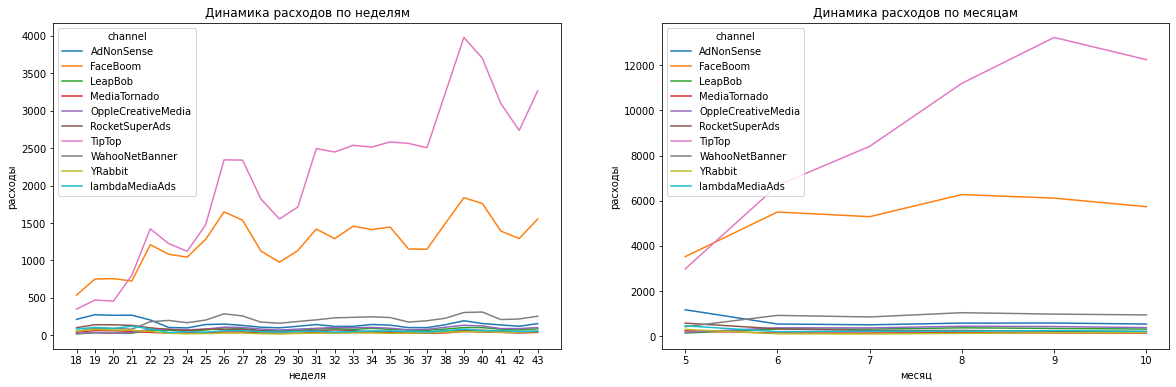

In [46]:
plt.figure(figsize=(20,6))
#недельные расходы на рекламу
report_week = costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
#расходы по неделям
report_week.T.plot(
    grid=False,
    xticks=list(report_week.columns.values),
    ax=plt.subplot(1,2,1))
plt.xlabel('неделя')
plt.ylabel('расходы')
plt.title('Динамика расходов по неделям')
#месячные расходы на рекламу
report_month = costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')
#расходы по неделям
report_month.T.plot(
    grid=False,
    xticks=list(report_month.columns.values),
    ax=plt.subplot(1,2,2))
plt.xlabel('месяц')
plt.ylabel('расходы')
plt.title('Динамика расходов по месяцам')
plt.show()   

##### Вывод #####

Графики показывают что в период с мая по октябрь лидерами по привлечению денег на рекламу являются FaceBoom и TipTop. Затраты на рекламу канала TipTop с каждым месяцем увеличиваются с 4000 до 13000 y.e. 

#### Узнаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. ####

In [47]:
#cтоимость привлечения органических пользователей равна нулю
# cac на одного пользователя без учета органических пользователей
cac = profiles.query('channel != "organic"')[['user_id', 'acquisition_cost']].drop_duplicates().agg({'acquisition_cost':'mean'})
print(cac)

acquisition_cost   1.13
dtype: float64


In [48]:
#затраты на привлечение одного пользователя в рамках канала 
channel_cac = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')\
.sort_values(by='acquisition_cost', ascending=False)\
.rename(columns={'acquisition_cost': 'cac'})\
.reset_index()
(channel_cac)

,channel,cac
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,YRabbit,0.22
8,MediaTornado,0.22
9,LeapBob,0.21


##### Вывод #####

Больше всех тратили деньги на пользователя через канал TipTop 2.80 y.e.

#### Вывод ####

1. Общая сумма расходов на маркетинг составила 105497 y.e.
2. Определили лидера по расходу средств на привлечение пользователя - канал TipTop (51.9%), второе место FaceBoom (30,75%).На другие каналы приходится от 1 до 5% расхода средств.
3. Визуализация динамики расхода средств по недели и месяцу также показали лидерство канала TipTop (свеше 12000 y.e. на сентябрь месяц). Второе место занимает канал FaceBoom - по 6000 y.e.(примерно) в течении 4 месяцев. Остальные каналы имеют траты по 200-300 y.e. в месяц  в течении всего периода анализа. среди группы с низкими тратами выделяется канал WahooNetBanner -с мая по июнь траты увеличились до 1000 y.e. и продержались так до октября.
4. Средняя стоимость привлечения пользователя по каналам находится в диапазоне от 0,21 (каналы LeapBob, mediaTornado, YRabbit) до 1,11 и 2,80 у FaceBoom и TipTop соответственно.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы - графики LTV, ROI, графики динамики LTV, ROI, CAC. ####

In [49]:
# фрейм без органических пользователей
profiles = profiles.query('channel != "organic"')

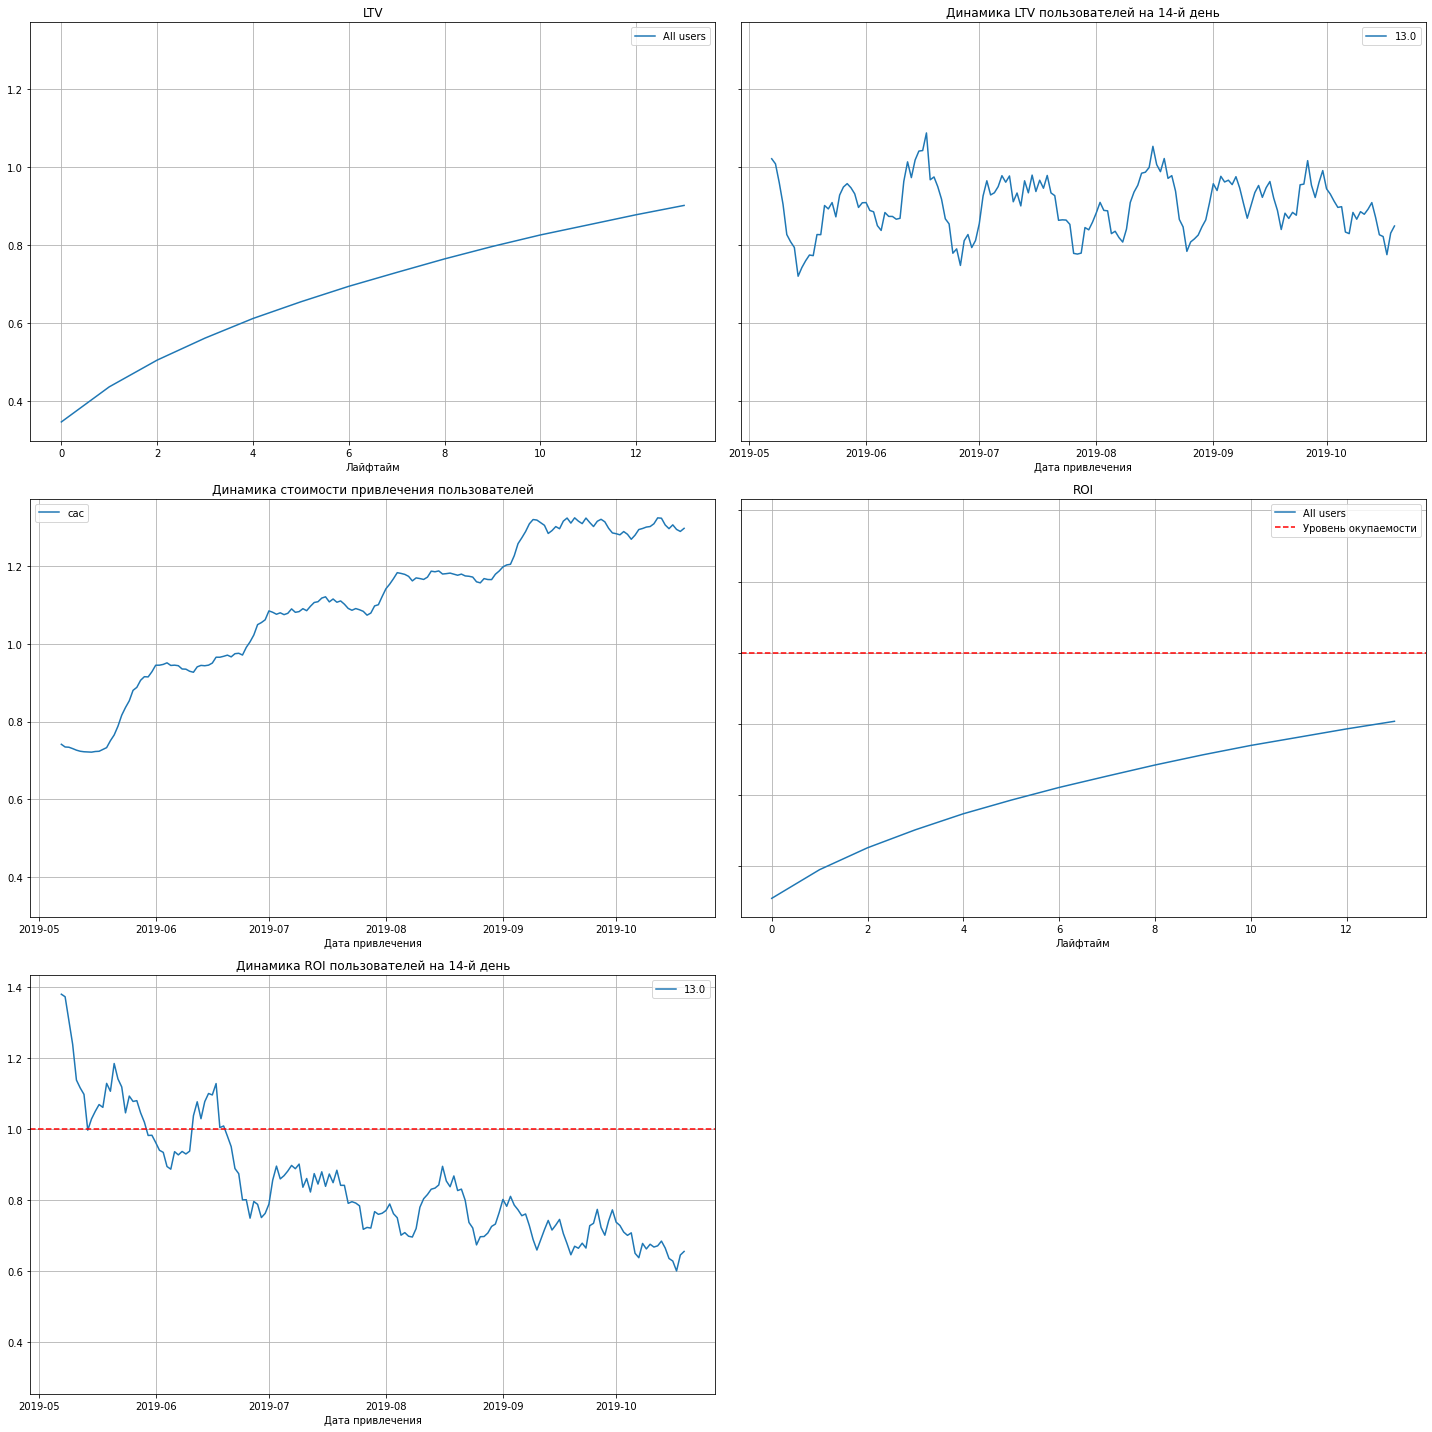

In [50]:
horison_days = 14
# расчет LTV, ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horison_days)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

##### Вывод #####

Динамика LTV находится в границах канала - без увеличения (нет роста прибыли для владельца приложения). Причем с течием времени идет увеличение рекламных затрат (это влияние затрат 2 каналов), а график окупаемости ROI показывает падение с июня. Как результат - вложения в рекламу по всем каналам суммарно не окупаются. 

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. ####

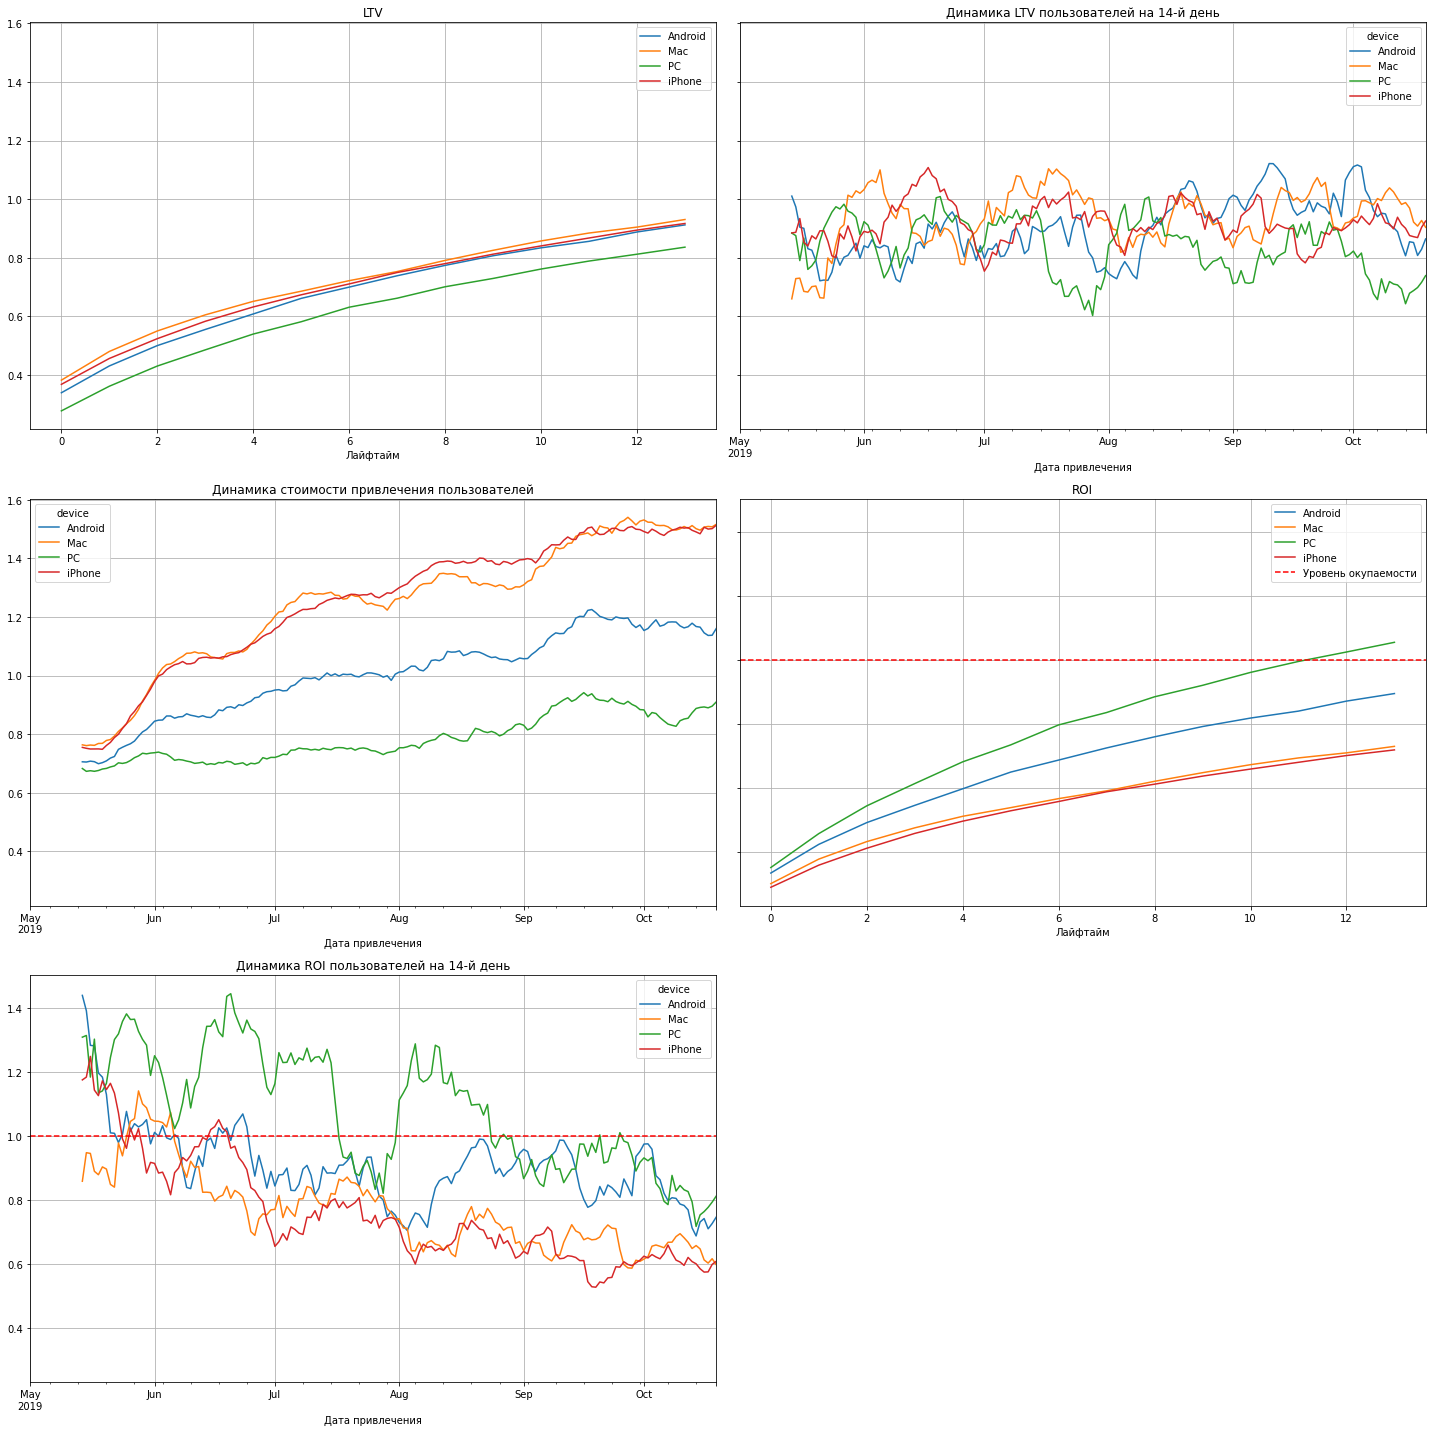

In [51]:
# строим графики по устройствам
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horison_days, \
                                                                     dimensions=dimensions)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horison_days, 14)

Динамика LTV также находится в  канале с подьемом к середине месяца, затем спад. ROI до июня находился выше 1, затем начал снижаться у всех пользователей (лучше всех ROI PC - он в 2 раза дольше всех остальных находился выше зоны окупаемости). Для продукции Apple наблюдается увеличение динамики стоимости привлечения пользователя. Для всех пользователей наблюдается рост стоимости привлечения и спад в окупаемости этих вложений.

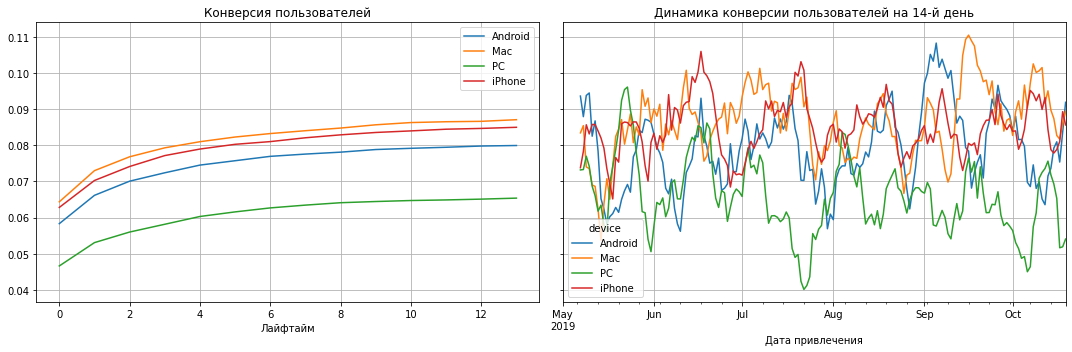

In [52]:
# посчитаем конверсию
dimensions=['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders,\
                                                                        observation_date, 
                                                                        horizon_days, 
                                                                        dimensions = dimensions)
plot_conversion(conversion_grouped, conversion_history, horison_days)

Группы пользователей разбитых по устройству пользования имеют примерную растущую конверсию, отстает только пользователь PC.

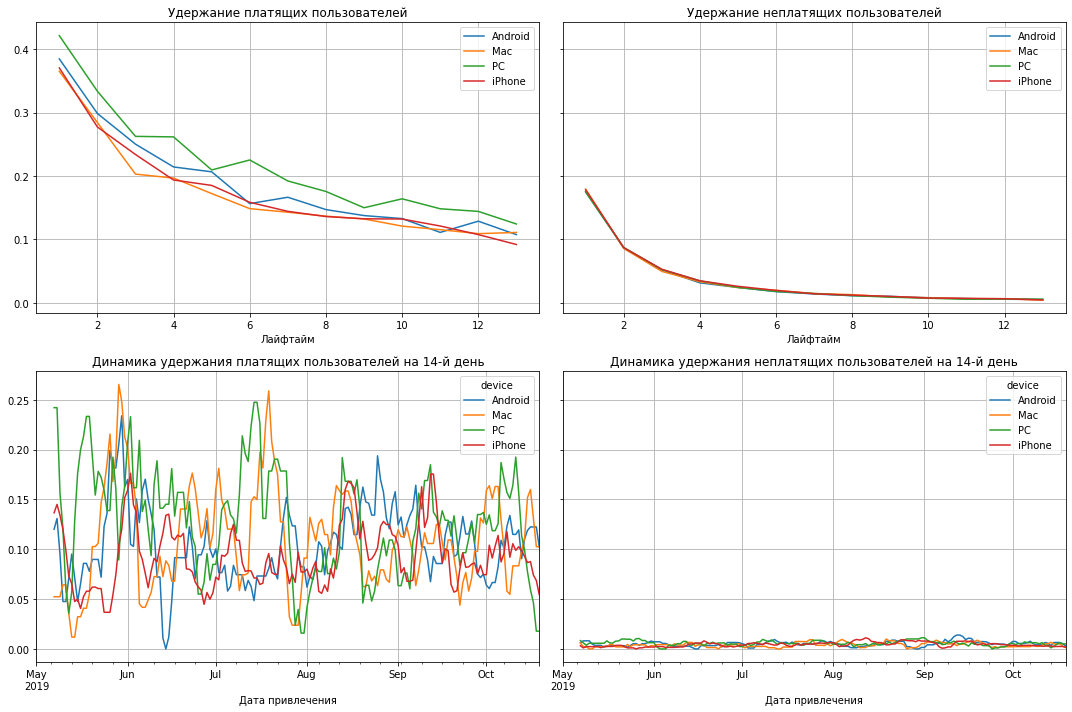

In [53]:
# удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                                                                    visits, 
                                                                    observation_date, 
                                                                    horison_days, 
                                                                    dimensions = dimensions)
plot_retention(retention_grouped,retention_history, horison_days)

Удержание пользователей не выделяет каких-то лидеров. Неплатящие пользователи плохо удерживаются в течении всего периода анализа. Платящие пользователи PC лучше других удерживаются в периоде 14 дней, хуже всего удерживаются пользователи Apple.

##### Вывод #####

Группы пользователей разбитых по устройству пользования имеют примерную растущую конверсию, отстает только пользователь PC, который имеет более лучшее удержание (платящие пользователи). Хуже всего удерживаются пользователи Apple у которых показатель ROI ниже чем у других, при явном увеличении вложений (LTV выше других групп).

#### Проанализируем окупаемость рекламы с разбивкой по странам. ####

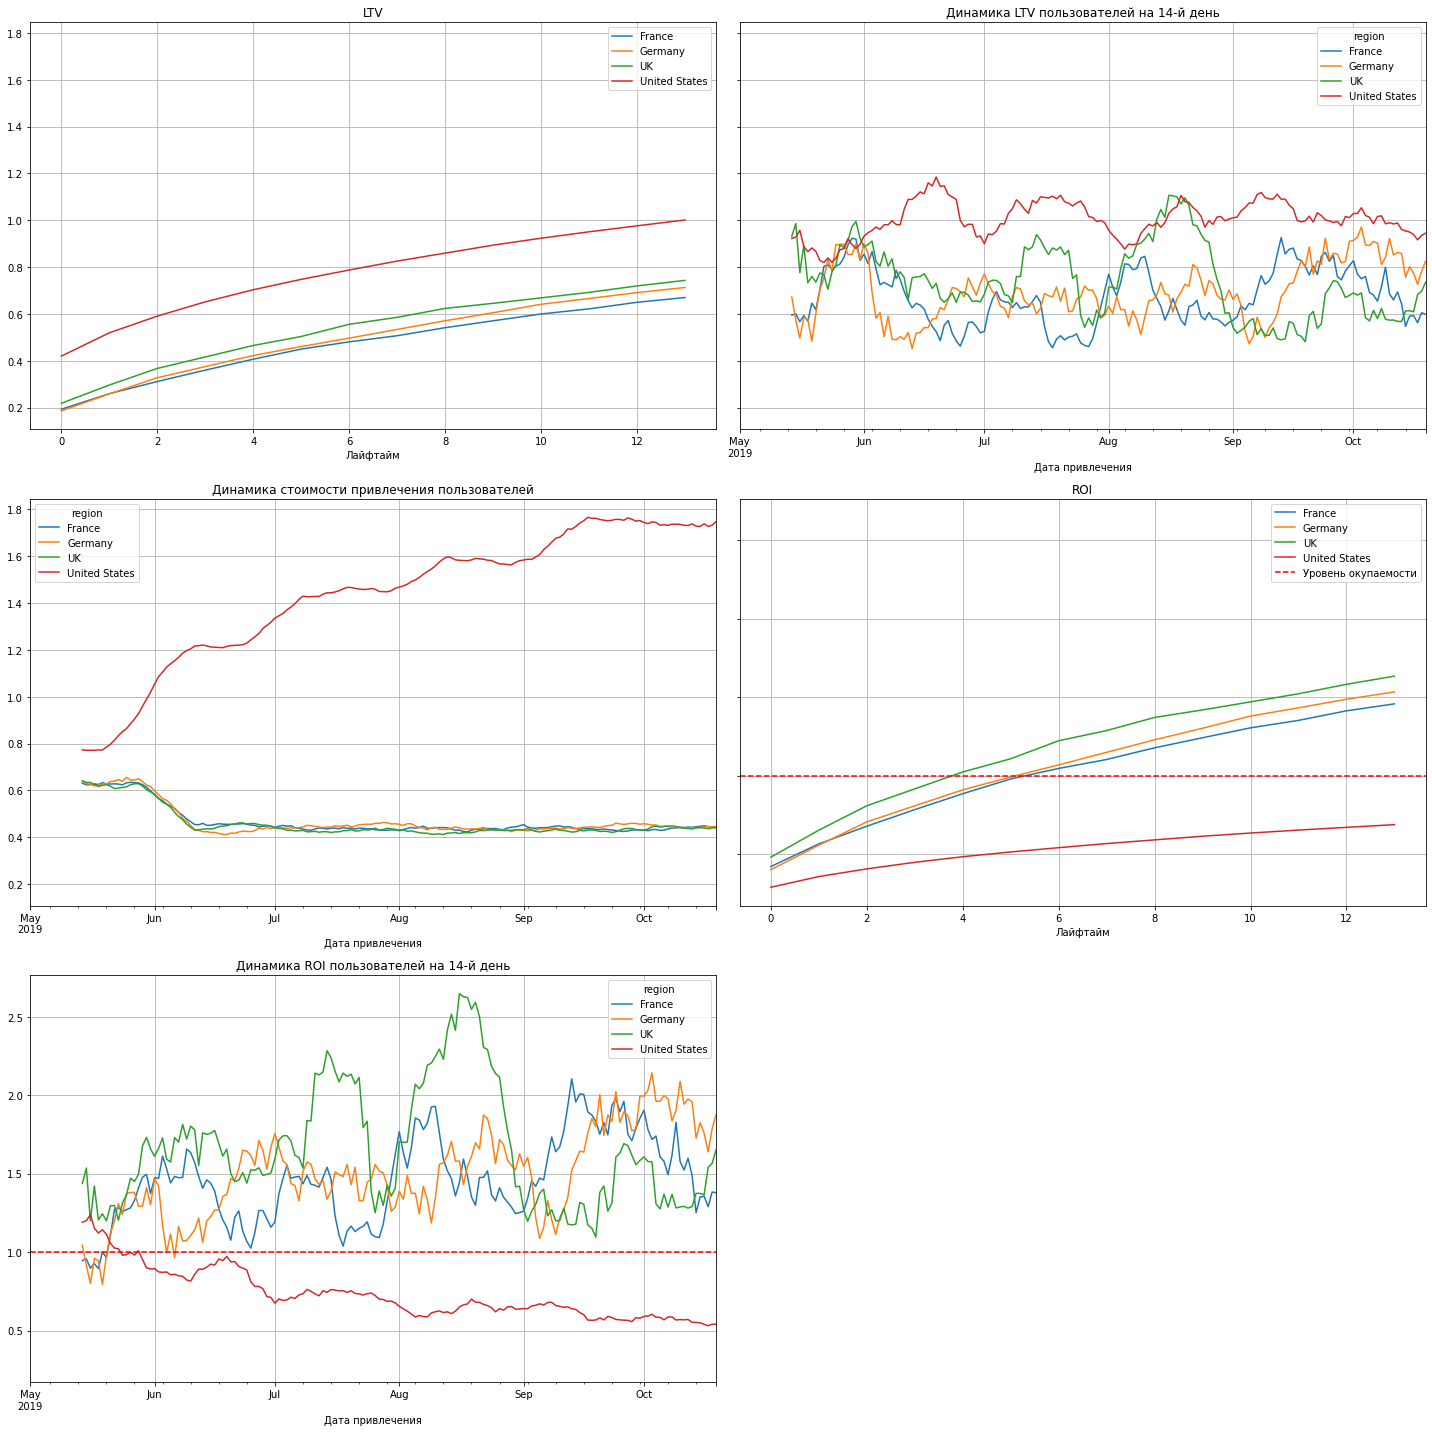

In [54]:
# строим графики по странам
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horison_days, \
                                                                     dimensions=dimensions)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horison_days, 14)

На всех графиках группа United States выделяется:
1. LTV выше других групп в периоде 14 дней и во всем периоде анализа
2. Динамика стоимости привлечения пользователя ростет с 0,8 до 1,8, в то время как другие страны показывают снижение 0,6 - 0,4
3. Окупаемость в периоде с мая по октябрь снижаестя, а за 14 дней даже не доходит до точки безубыточности
4. Окупаемость в европейских странах выше 1 с середины мая
Такая разница во вложениях и окупаемости по странам возможно связана с  выходом похожего приложения на рынке Америки и для устройств Apple.

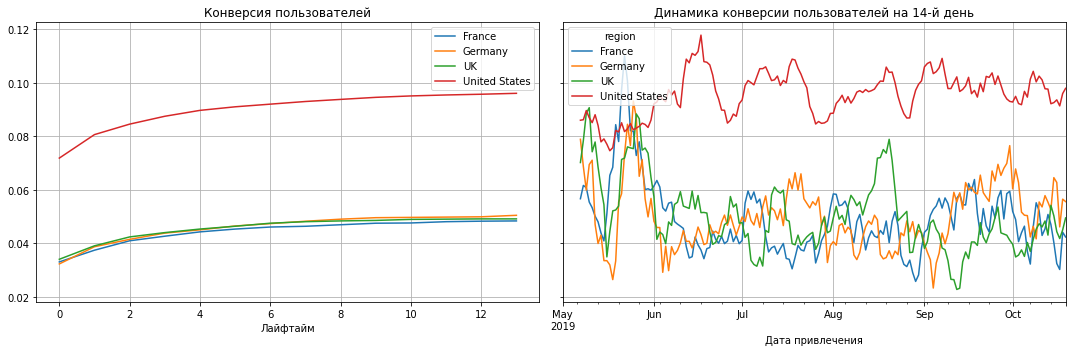

In [55]:
# посчитаем конверсию
dimensions=['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders,\
                                                                        observation_date, 
                                                                        horizon_days, 
                                                                        dimensions = dimensions)
plot_conversion(conversion_grouped, conversion_history, horison_days)

Конверсия пользователей приложения европейских стран в 2 раза меньше чем конверсия пользователей США в периоде 14 дней. В рассматриваемом периоде с мая по октябрь видим скачок вверх конверсии с середины мая и резкое падение для пользователей Франции, Германии, Англии. Также есть два скачка конверсии в середине августа для UK и в конце сентября  для Germany. 

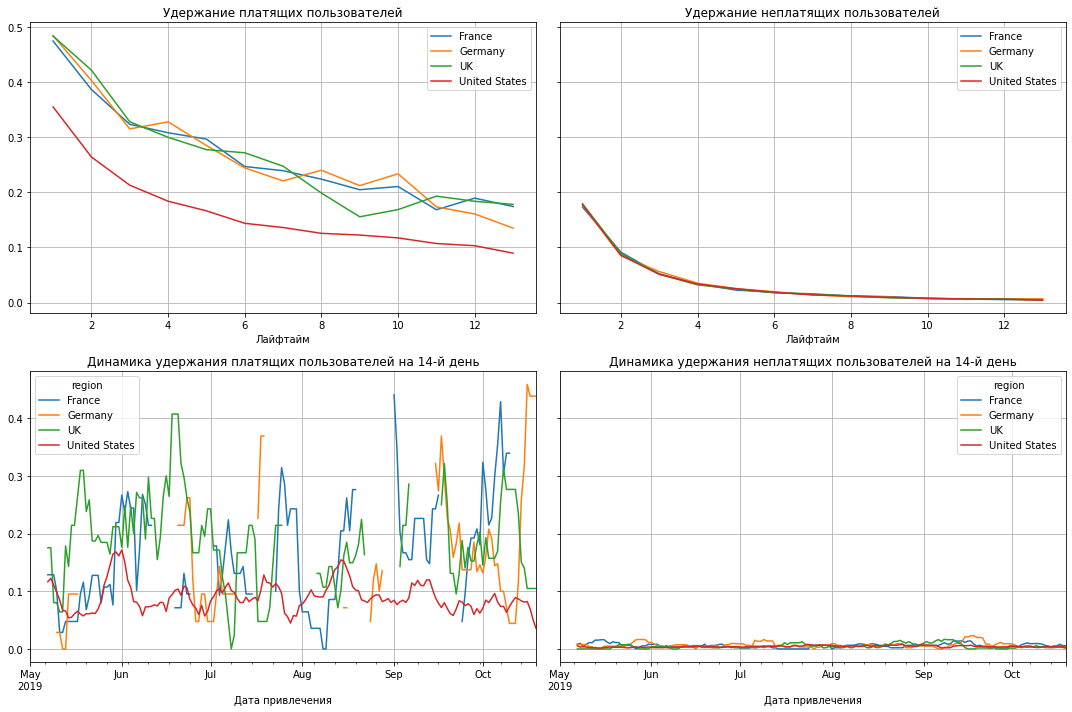

In [56]:
# удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                                                                    visits, 
                                                                    observation_date, 
                                                                    horison_days, 
                                                                    dimensions = dimensions)
plot_retention(retention_grouped, retention_history, horison_days)

##### Вывод #####

Графики подтверждают выделение пользователей США по мерикам
1. LTV выше других групп в периоде 14 дней и во всем периоде анализа
2. Динамика стоимости привлечения пользователя ростет с 0,8 до 1,8, в то время как другие страны показывают снижение 0,6 - 0,4
3. Окупаемость в периоде с мая по октябрь снижается, а за 14 дней даже не доходит до точки безубыточности
4. Окупаемость в европейских странах выше 1 с середины мая
5. Конверсия пользователей приложения европейских стран в 2 раза меньше чем конверсия пользователей США в периоде 14 дней.
6. Удержание неплатящих пользователей для всех стран одинаково.
7. Удержание платящих пользователей США находится на уровне 10-15%, в то время как Европейские страны периодически сменяют друг друга и показывают результат с 15 до 40%.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. ####

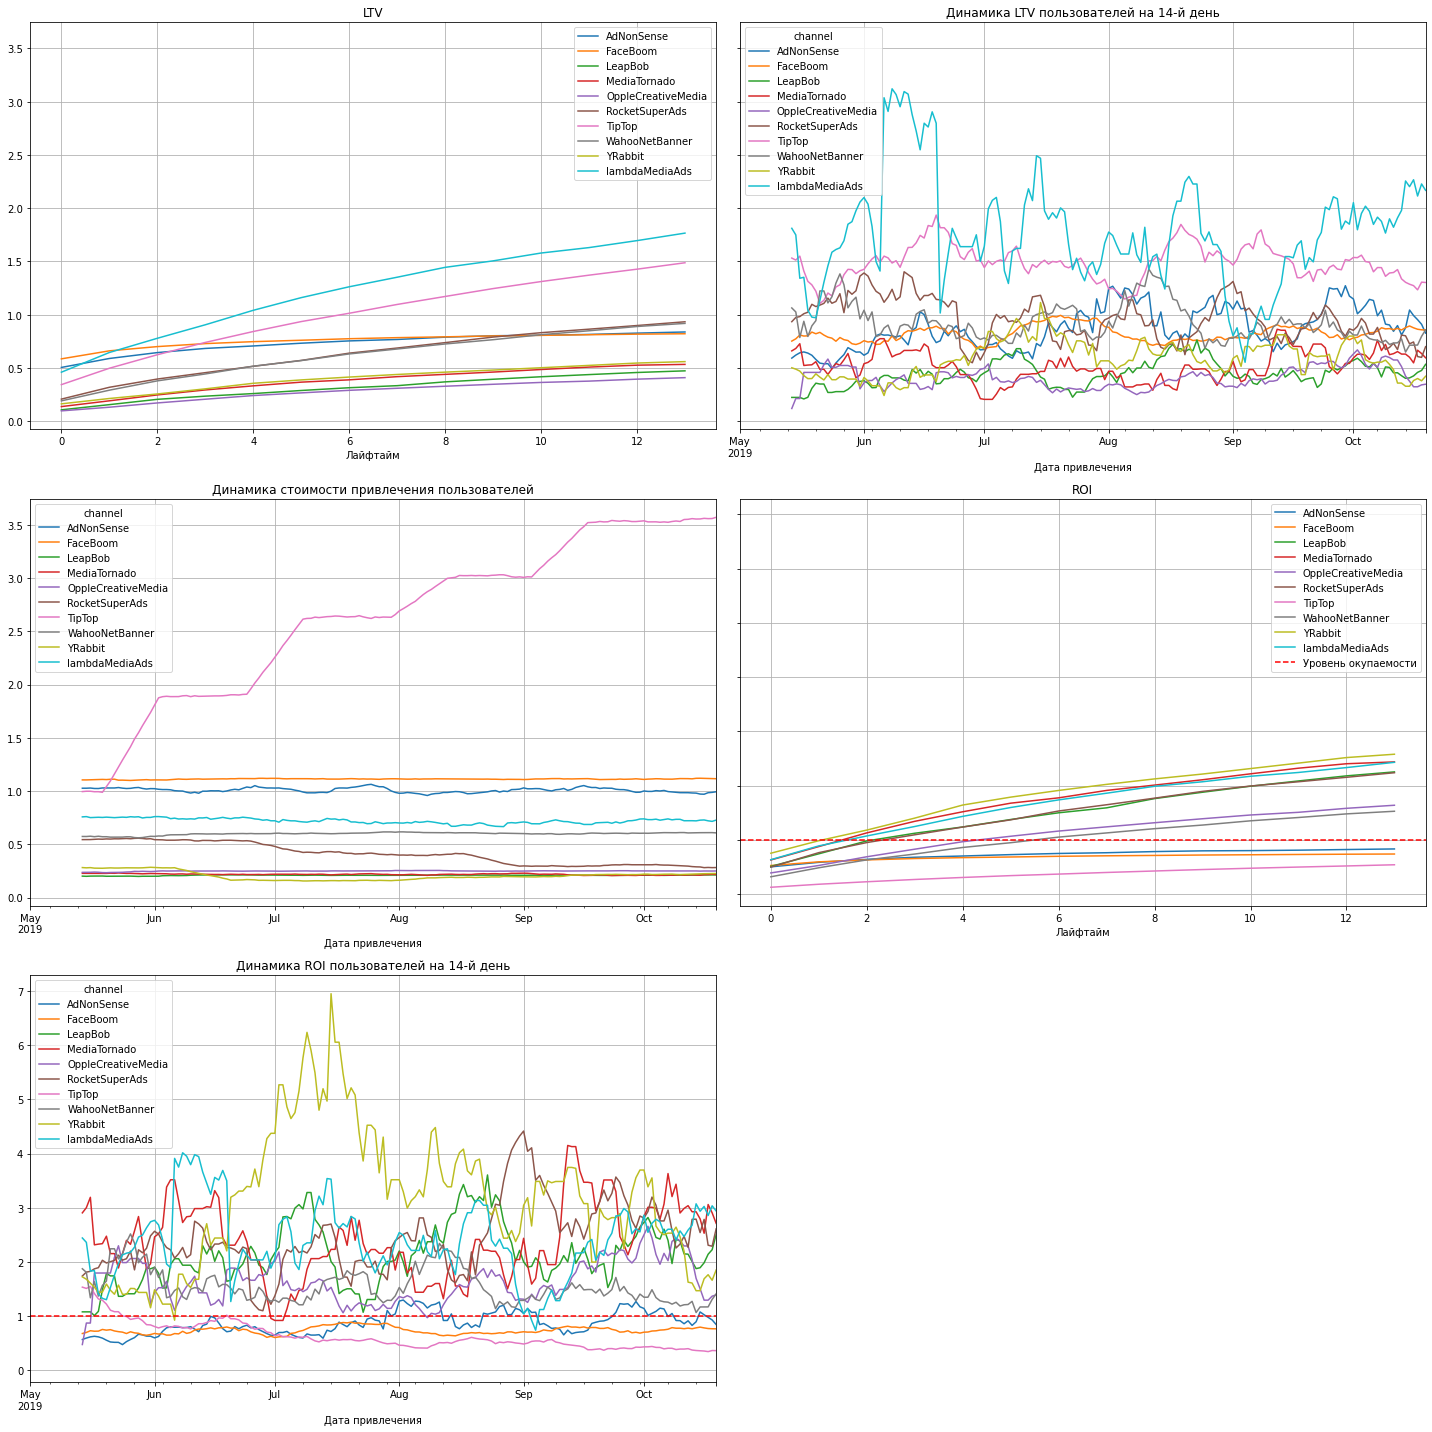

In [57]:
# строим графики по рекламным каналам
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horison_days, \
                                                                     dimensions=dimensions)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horison_days, 14)

Не окупаются пользователи каналов AdNonSense, FaceBoom, TipTop. Видим сильное увеличение расходов на рекламу в TipTop, в других каналах CAC держится на одном уровне в течении всего периода. ROI канала YRabbit поднималась выше других весь июль и август.

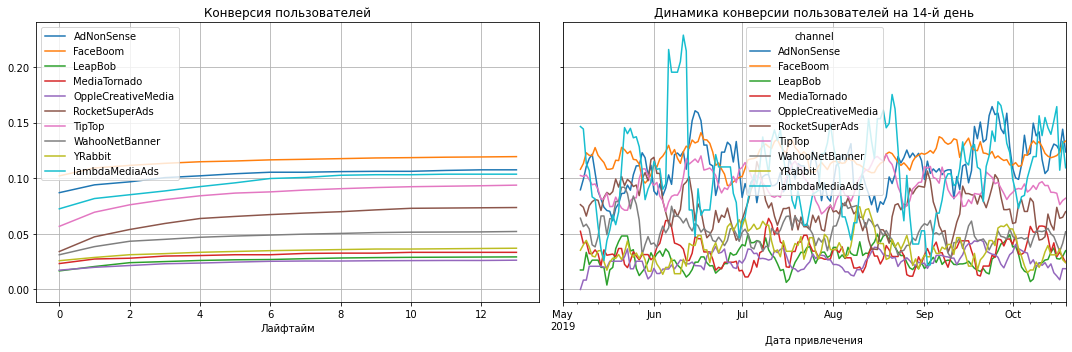

In [58]:
# посчитаем конверсию
dimensions=['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders,\
                                                                        observation_date, 
                                                                        horizon_days, 
                                                                        dimensions = dimensions)
plot_conversion(conversion_grouped, conversion_history, horison_days)

Конверсия пользователей по всем каналам стабильная во всем периоде анализа. Чуть выше у каналов FaceBoom, AdNonSense, LambdaMediaAds, TipTop.

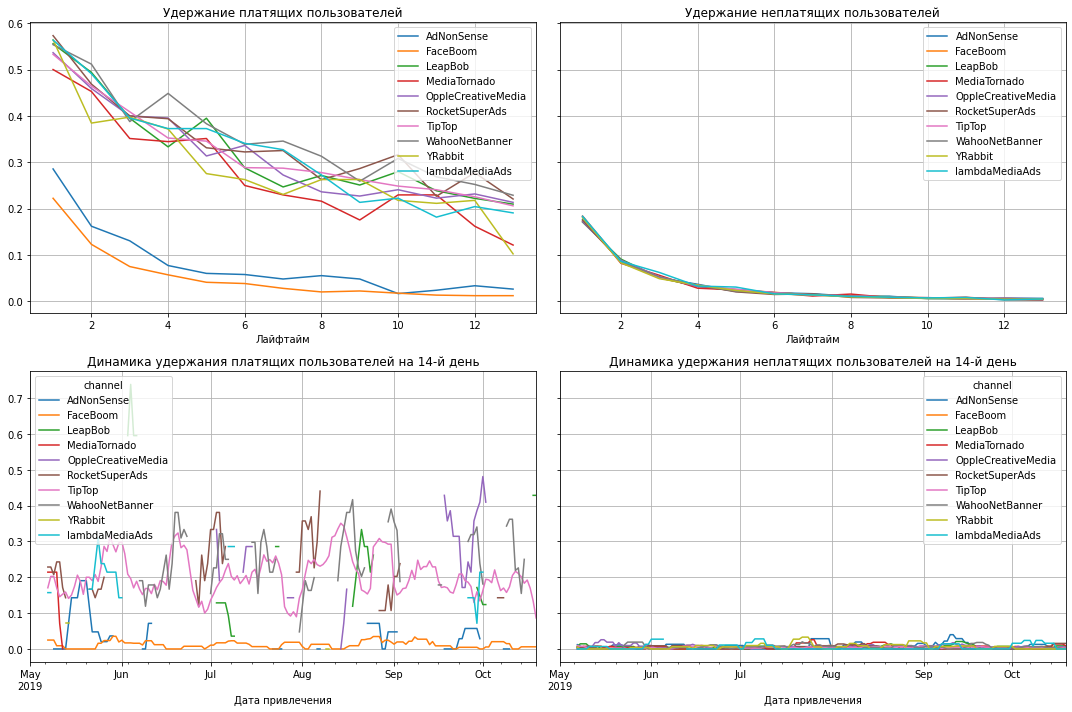

In [59]:
# удержание с разбивкой по рекламным каналам
retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                                                                    visits, 
                                                                    observation_date, 
                                                                    horison_days, 
                                                                    dimensions = dimensions)
plot_retention(retention_grouped, retention_history, horison_days)

Удержание платящих пользователей слабее всего у каналов FaceBoom, AdNonSense, уже на 2 день в 4-5 раз меньше других каналов. Ситуация сохраняется в течении 14 дней и всего периода исследования. Неплатящие пользователи удерживаются плохо.

##### Вывод #####

Сильное увеличение расходов на рекламу в TipTop не дает окупаемости. Не окупаются и пользователи каналов AdNonSense, FaceBoom. ROI канала YRabbit поднималась выше других весь июль и август. Конверсия пользователей по всем каналам стабильная во всем периоде анализа. Чуть выше у каналов FaceBoom, AdNonSense, LambdaMediaAds, TipTop. Самое плохое удержание платящих клиентов FaceBoom, AdNonSense. Не платящие как не платили так и не платят на пользование приложением.

#### Вывод ####

1. Большие суммы вложений в один канал на коротком промежутке времени не окупается - пример канал TipTop и FaceBoom. 
2. В данном проекте 60% пользователей составляют жители США где самая низкая окупаемость рекламы (удержание самое низкое при большей конверсии чем у пользователей европейских стран.
3. Ниже всех конверсия у PC, а удержание и ROI  лучше чем у остальных устройств.
4. не смотря на  то что LTV e каналjd TipTop, FaceBoom выше чем у других каналов высокие траты на рекламу не дают окупаемости (ROI ниже всех каналов). 
5. Общая окупаемость вложений не доходит до 1 в течении всего периода для всех каналов. По отдельности график ROI  указывает что 3 канала TipTop, FaceBoom, AdNonSense которые имеют больше всего вложений не окупаются и поэтому меняют общую картину.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### Вывод ####

Мы проанализировали данные предоставленные компанией владелецей  развлекательного приложения Procrastinate Pro+ за период с 1.05.2019 по 27.10.2019г.
Последние несколько месяцев компания несет убытки, несмотря на огромные вложения в рекламу.

В результате исследования данных выяснили что финансовые потери компании связаны с высокими тратами на рекламу для привлечение пользователей через канал TipTop (это самый выраженный пример), каналы FaceBoom, AdNonSense так же находятся  в тройке по соотношению прибыль/затраты - это подтверждается графиками:
1. CAC - для TipTop рост в течении всего периода с 1 до 3,5 ед
2. LTV - канала TipTop в 1,5 ед не позволяет окупить затраты
3. невысокая конверсия - 4 место среди всех представленных каналов 
4. удержание платящих пользователей у каналов FaceBoom, AdNonSense самое низкое.

#### Рекомендации ####

1. Необходимо увеличить расходы на рекламу в каналы с большей окупаемостью - YRabbit, RocketSuperAds и снизить в каналы TipTop, FaceBoom, AdNonSense.
2. Рынок США для приложения составляет 60% пользователей, где больше всего платящих - добавить пользователям всевозможные плюшки, что бы на волне рекламы повысить удержание и привлечь прибыль.
3. Проработать группу organic - это 30% всех пользователей приложения.
4. В странах Германии и Франции есть пропуски на графике удержания - наверное пользователи не возвращаются в приложение в период 14 дней - может их не устраивает функционал приложения - выяснить причины.